In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
fifa_players = pd.read_csv('fifa_players.csv')
happiness = pd.read_csv('country_happiness_report.csv')
winners = pd.read_csv('historical_world_cup_top_three.csv')
# print("happiness: ", happiness.head())

In [3]:
# question: Is there a visual relation between winning countries and overall_rating for players?
# find players from winning countries
winners_fifa = fifa_players[fifa_players.nationality.isin(winners.Winner)]
winners_fifa = winners_fifa.sort_values('nationality', ascending=True)

# winners_fifa.head()

 

In [4]:
# Also, is there a visual relation between winning countries and happiness?
# get happiness data from winning countries
winners_happiness = happiness[happiness.country.isin(winners.Winner)]
winners_happiness = winners_happiness.sort_values('country', ascending=True)

In [5]:
# min_max normalization for overall_rating
winners_fifa_unnormalized =winners_fifa['overall_rating'].values
min_max_scaler = preprocessing.MinMaxScaler()
winners_fifa_scaled = min_max_scaler.fit_transform(winners_fifa_unnormalized.reshape(-1, 1))
winners_fifa['overall_rating'] = winners_fifa_scaled

In [6]:
# min_max normalization for happiness
winners_happy_unnormalized = winners_happiness['Life Ladder'].values
min_max_scaler2 = preprocessing.MinMaxScaler()
winners_happy_scaled = min_max_scaler2.fit_transform(winners_happy_unnormalized.reshape(-1, 1))
winners_happiness['Life Ladder'] = winners_happy_scaled
winners_happiness.rename(columns={'Life Ladder': 'LifeLadder'}, inplace=True)
# winners_happiness.head()

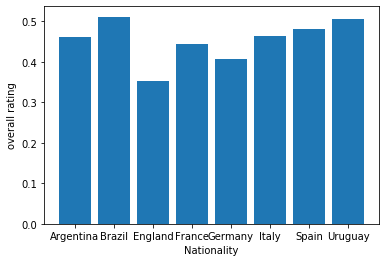

In [7]:
x_rating = winners_fifa.nationality.unique()
y_rating = winners_fifa.groupby('nationality').overall_rating.mean()

plt.bar(x_rating, y_rating, label="overall_rating")
plt.ylabel('overall rating')
plt.xlabel('Nationality');

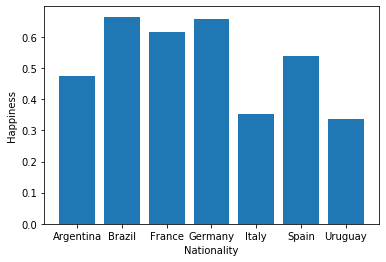

In [8]:
x_happiness = winners_happiness.country.unique()
y_happiness = winners_happiness.groupby('country').LifeLadder.mean()

plt.bar(x_happiness, y_happiness, label="Happiness")
plt.ylabel('Happiness')
plt.xlabel('Nationality');

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

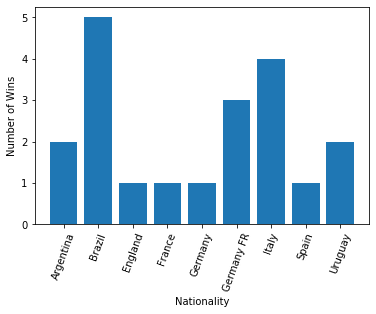

In [9]:
winners = winners.sort_values('Winner', ascending=True)
x_num_wins = winners.Winner.unique()
y_num_wins = winners.groupby('Winner').Year.count()
plt.bar(x_num_wins, y_num_wins, label="number of wins")
plt.ylabel('Number of Wins')
plt.xlabel('Nationality');
plt.xticks(rotation=70)